In [1]:
!pip install catboost

In [73]:
## Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Modelling
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


## Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

## Load the Data

In [3]:
!wget https://github.com/gbiamgaurav/github_datasets/raw/main/RTA-Dataset.zip
!unzip /content/RTA-Dataset.zip

--2023-09-04 08:51:36--  https://github.com/gbiamgaurav/github_datasets/raw/main/RTA-Dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/gbiamgaurav/github_datasets/main/RTA-Dataset.zip [following]
--2023-09-04 08:51:36--  https://media.githubusercontent.com/media/gbiamgaurav/github_datasets/main/RTA-Dataset.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280014 (273K) [application/zip]
Saving to: ‘RTA-Dataset.zip’

RTA-Dataset.zip     100%[===================>] 273.45K  --.-KB/s    in 0.03s   

2023-09-04 08:51:36 (8.34 MB/s) - ‘RTA-Dataset.zip’ saved [280014/280014]

## Exploratory data Analysis

In [4]:
df = pd.read_csv("RTA Dataset.csv")

df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
df.shape

(12316, 32)

In [6]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [7]:
# renaming columns
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' ,
    'Age_band_of_casualty': 'casualty_age',
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work',
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [9]:
df = df.drop(columns=['time'], axis=1)
df.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [10]:
## Checking the unique columns in dataframe

df.describe(include=['O']).T

,count,unique,top,freq
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883
vehicle_defect,7889,3,No defect,7777


In [11]:
## Check the numerical statistics

df.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [12]:
## checking for null values

df.isnull().sum()

day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident_severity             0
dtype: i

Most of the columns which are having null values are categorical columns, there are no null values in numerical columns !!

In [13]:
## Checking the duplicate columns
print("Number of duplicates: ", df.duplicated().sum())
print("Unique values per column:")
df.nunique()

Number of duplicates:  0
Unique values per column:


day_of_week                 7
driver_age                  5
driver_sex                  3
educational_level           7
vehicle_driver_relation     4
driving_experience          7
vehicle_type               17
vehicle_owner               4
service_year                6
vehicle_defect              3
accident_area              14
lanes                       7
road_allignment             9
junction_type               8
surface_type                5
road_surface_conditions     4
light_condition             4
weather_condition           9
collision_type             10
vehicles_involved           6
casualties                  8
vehicle_movement           13
casualty_class              4
casualty_sex                3
casualty_age                6
casualty_severity           4
casualty_work               7
casualty_fitness            5
pedestrian_movement         9
accident_cause             20
accident_severity           3
dtype: int64

In [16]:
df.columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity'],
      dtype='object')

In [14]:
df['accident_cause']

0                             Moving Backward
1                                  Overtaking
2                   Changing lane to the left
3                  Changing lane to the right
4                                  Overtaking
                         ...                 
12311                           No distancing
12312                           No distancing
12313              Changing lane to the right
12314    Driving under the influence of drugs
12315              Changing lane to the right
Name: accident_cause, Length: 12316, dtype: object

In [15]:
df['light_condition']

0                     Daylight
1                     Daylight
2                     Daylight
3        Darkness - lights lit
4        Darkness - lights lit
                 ...          
12311                 Daylight
12312                 Daylight
12313                 Daylight
12314    Darkness - lights lit
12315    Darkness - lights lit
Name: light_condition, Length: 12316, dtype: object

We can see there is an order in the categories, we shall follow ordinal encoding for the variables !!

In [17]:
## define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

## print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['vehicles_involved', 'casualties']

We have 29 categorical features : ['day_of_week', 'driver_age', 'driver_sex', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'vehicle_type', 'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area', 'lanes', 'road_allignment', 'junction_type', 'surface_type', 'road_surface_conditions', 'light_condition', 'weather_condition', 'collision_type', 'vehicle_movement', 'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity', 'casualty_work', 'casualty_fitness', 'pedestrian_movement', 'accident_cause', 'accident_severity']


## Exploring Data with Visualizations

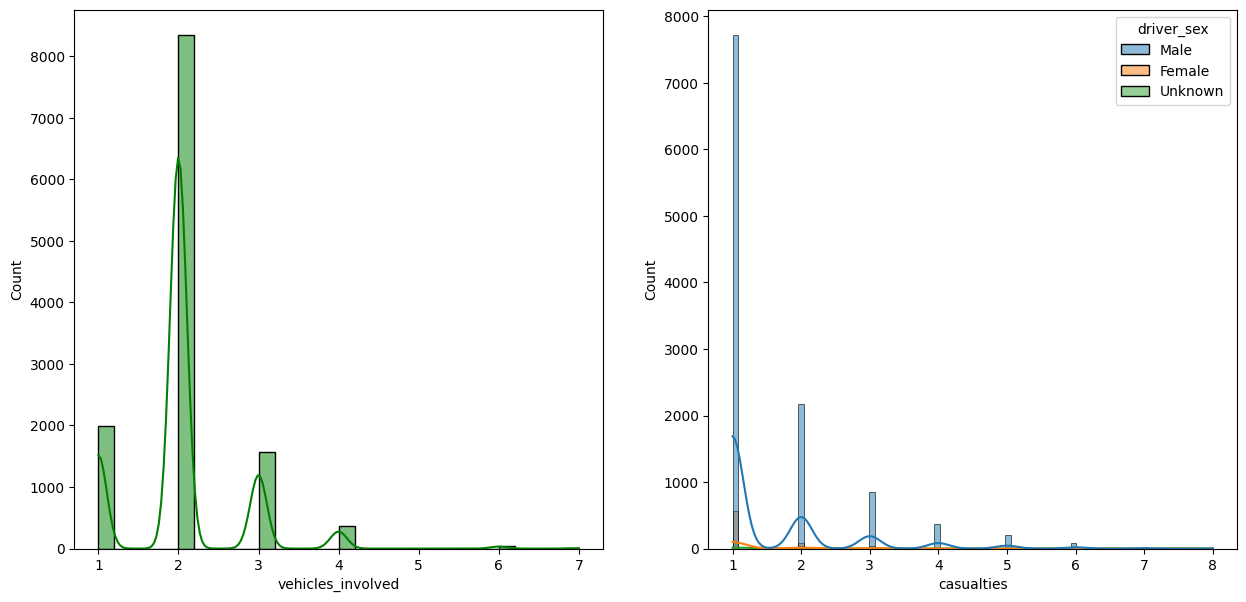

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='vehicles_involved',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='casualties',kde=True,hue='driver_sex')
plt.show()

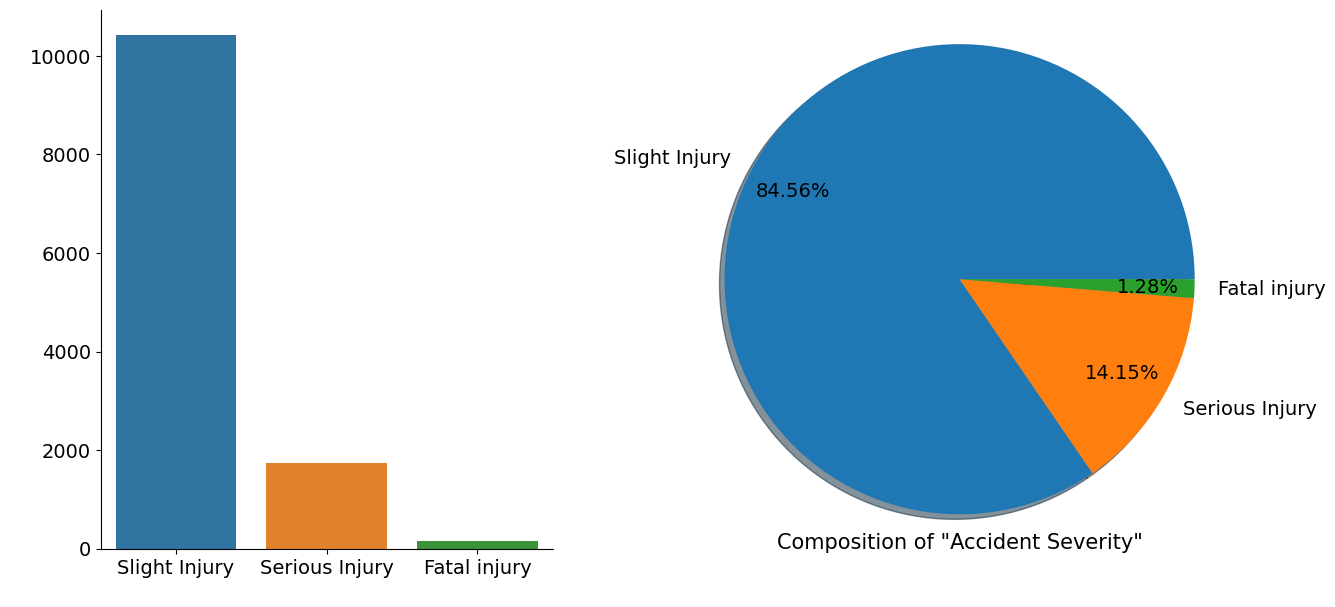

In [19]:
# checking the target
plt.figure(figsize=(14,7))

# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

We can see the target class is highly imbalanced, we will apply Upsamping techniques like SMOTE.

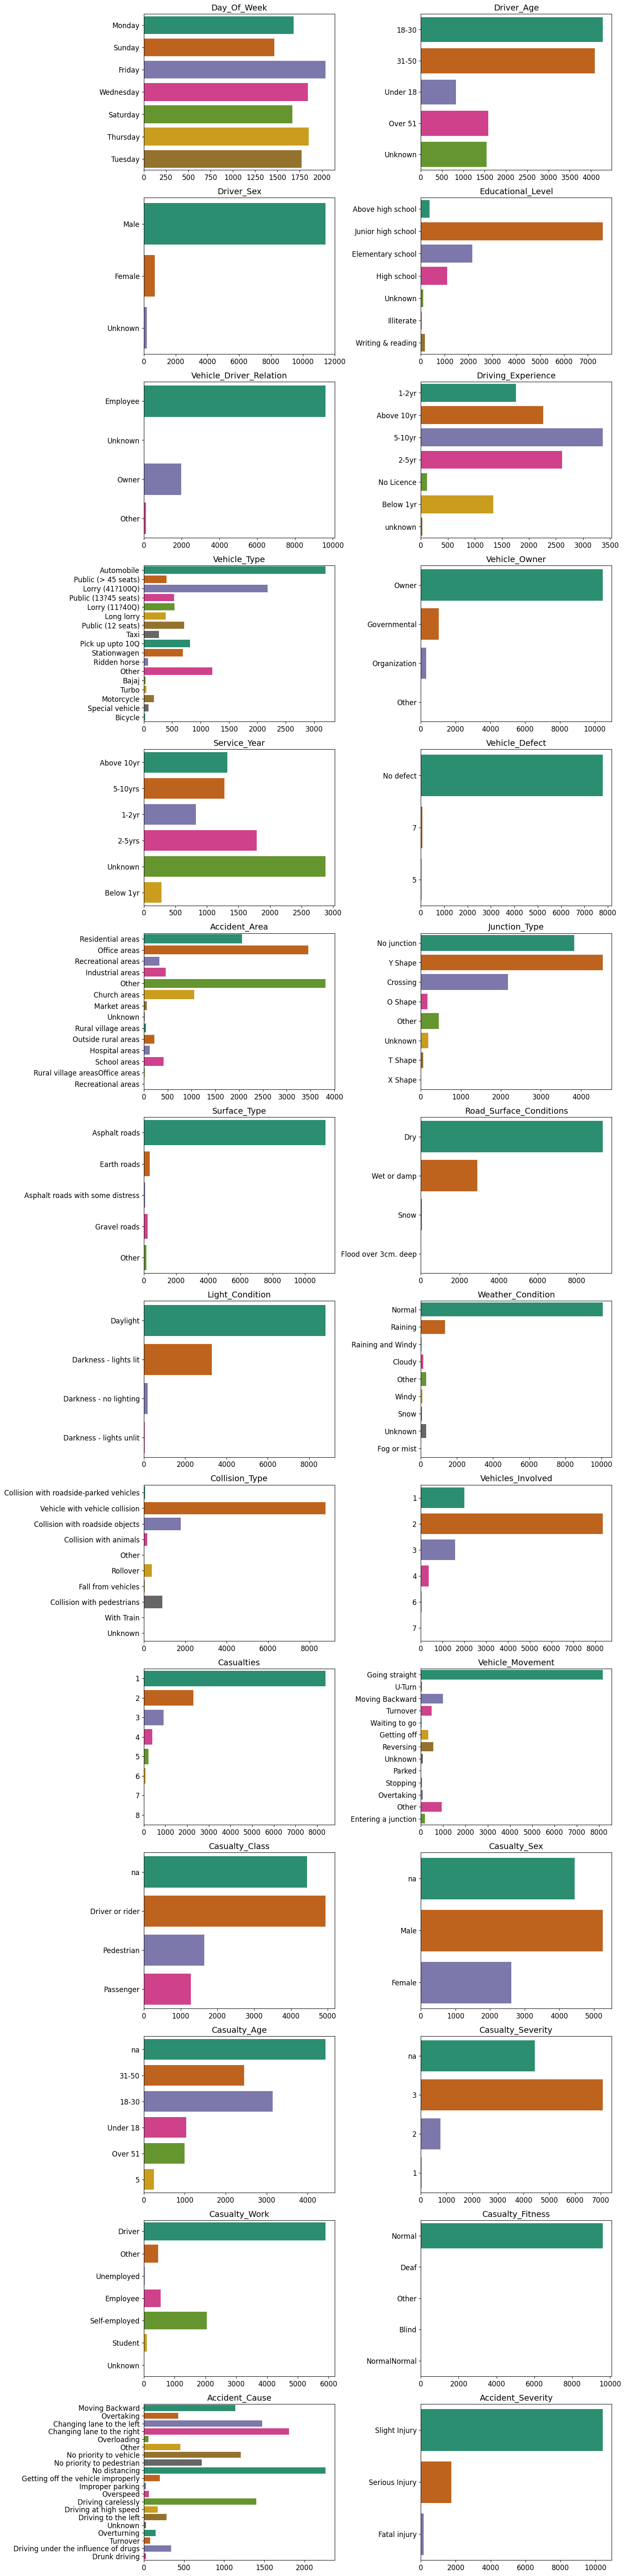

In [22]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

In [21]:
df["lanes"]

0                                                     NaN
1                                       Undivided Two way
2                                                   other
3                                                   other
4                                                   other
                               ...                       
12311                                   Undivided Two way
12312    Two-way (divided with broken lines road marking)
12313    Two-way (divided with broken lines road marking)
12314                                   Undivided Two way
12315                                   Undivided Two way
Name: lanes, Length: 12316, dtype: object

## Observations: -

* Most accidents happened on Friday
* Age group of driver's who met with accident are majorly in 18-30 years
* Male drivers had the most accidents
* Education level are mostly junior high school
* Most of the drivers who met with accidents are Employees
* Those who met with accident are experienced driver with 5-10 years of experience
* Vehicles which met with accidents are mostly Automobile
* Most vehicles are self-owned
* Service year of the vehicles are mostly unknown
* Most of the vehicles were not having any defect
* Accident areas are largely in case where area is unknown
* Most of the accident happened in Y Shape junction type
* Surface_type was Asphalt roads
* Road_surface_conditions were dry type
* Most accidents happened in Daylight
* Weather conditions were normal when most of the accident happened
* Collision type was vehicle to vehicle in most of the cases
* Vehicles involved are majorly 2
* Most casualty happened were only 1
* Most of the vehicles were going straight
* Most of the cases where casualty happened were drivers and were male
* Most of the accident cause were due to no distancing
* Most of the accident_severity is of Slight injury

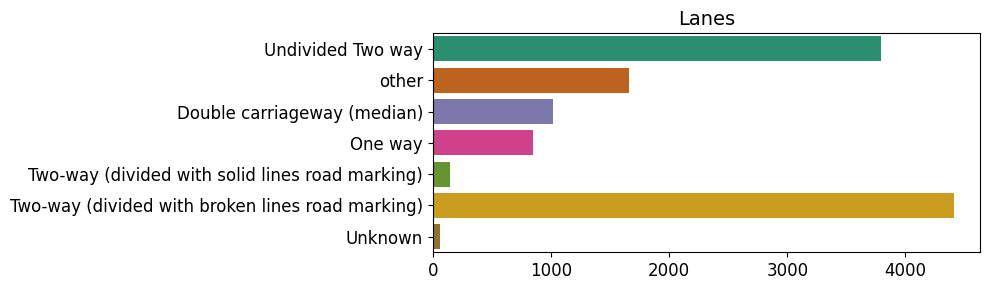

In [27]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

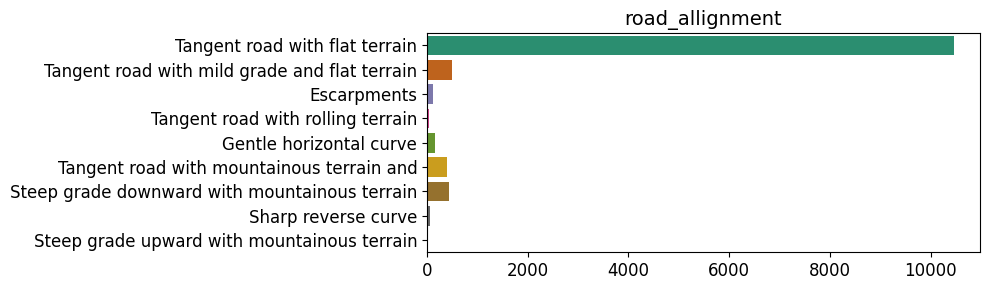

In [28]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('road_allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

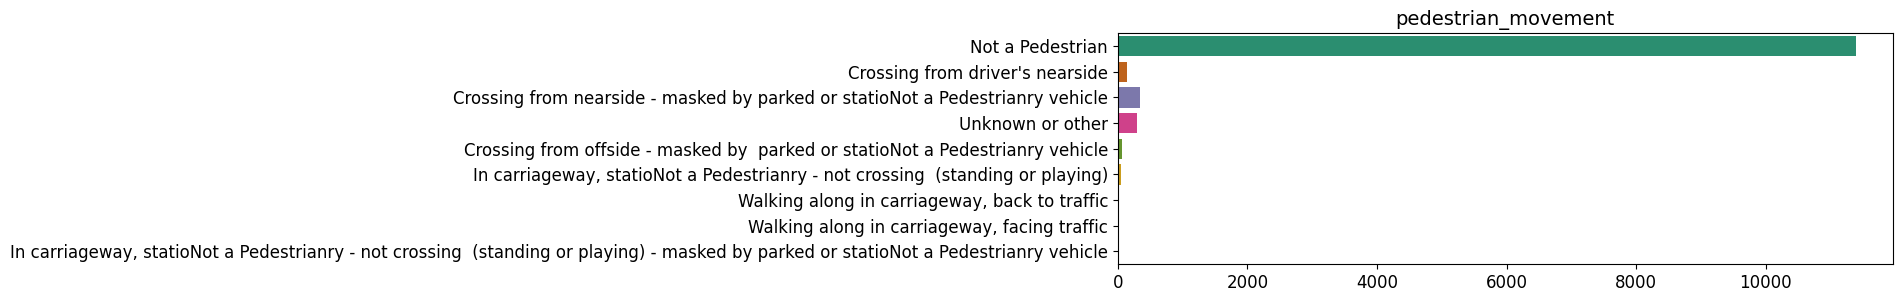

In [29]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('pedestrian_movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [30]:
numeric_features

['vehicles_involved', 'casualties']

In [31]:
categorical_features

['day_of_week',
 'driver_age',
 'driver_sex',
 'educational_level',
 'vehicle_driver_relation',
 'driving_experience',
 'vehicle_type',
 'vehicle_owner',
 'service_year',
 'vehicle_defect',
 'accident_area',
 'lanes',
 'road_allignment',
 'junction_type',
 'surface_type',
 'road_surface_conditions',
 'light_condition',
 'weather_condition',
 'collision_type',
 'vehicle_movement',
 'casualty_class',
 'casualty_sex',
 'casualty_age',
 'casualty_severity',
 'casualty_work',
 'casualty_fitness',
 'pedestrian_movement',
 'accident_cause',
 'accident_severity']

In [32]:
num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols]

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Data - Preprocessing

In [34]:
## check for missing values

df.isna().sum()[df.isna().sum() != 0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
collision_type              155
vehicle_movement            308
casualty_work              3198
casualty_fitness           2635
dtype: int64

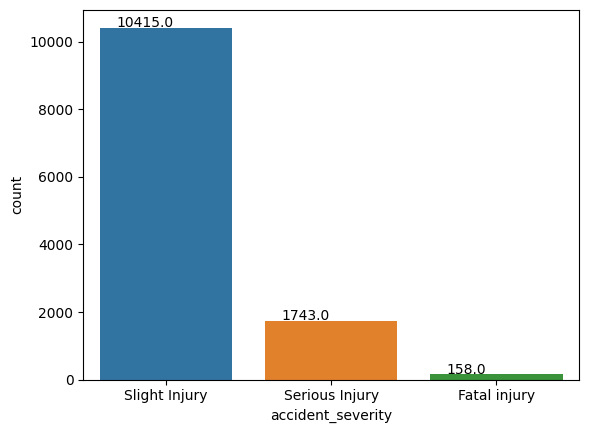

In [49]:
ax = sns.countplot(x=df["accident_severity"])
for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x()+0.10, p.get_height()+10))

plt.show()

In [50]:
## Impute missing values with mode - Why ?? -- Since all the variables are categorical we used mode

impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]

for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [51]:
## Check for missing values after imputation

df.isnull().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
vehicle_driver_relation    0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
vehicle_defect             0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
casualty_work              0
casualty_fitness           0
pedestrian_movement        0
accident_cause             0
accident_severity          0
dtype: int64

There are no missing values now, we shall proceed for encoding

In [52]:
df.columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity'],
      dtype='object')

In [53]:
df.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


### Divide the dataset into numerical and categorical features

In [54]:
numerical_features = df.select_dtypes(exclude="object").columns

numerical_features

Index(['vehicles_involved', 'casualties'], dtype='object')

In [55]:
categorical_features = df.select_dtypes(include="object").columns

categorical_features

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicle_movement', 'casualty_class', 'casualty_sex',
       'casualty_age', 'casualty_severity', 'casualty_work',
       'casualty_fitness', 'pedestrian_movement', 'accident_cause',
       'accident_severity'],
      dtype='object')

## Encode with Column Transformer

In [58]:
## Define the pipeline

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder()),
        ("scaler", StandardScaler(with_mean=False))
    ]
)

In [60]:
df.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [61]:
X = df.drop(columns=['accident_severity'], axis=1)

y = df["accident_severity"]

In [62]:
X.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,2,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking


In [63]:
y.head()

0     Slight Injury
1     Slight Injury
2    Serious Injury
3     Slight Injury
4     Slight Injury
Name: accident_severity, dtype: object

In [68]:
y.value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: accident_severity, dtype: int64

In [69]:
## Mannually encoding the target variable

y = y.replace({'Slight Injury': 0,
               'Serious Injury': 1,
               'Fatal injury': 2})

In [70]:
## Define numerical and categorical features

## numerical features

numeric_features = X.select_dtypes(exclude="object").columns
numeric_features

Index(['vehicles_involved', 'casualties'], dtype='object')

In [71]:
## Categorical features

categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicle_movement', 'casualty_class', 'casualty_sex',
       'casualty_age', 'casualty_severity', 'casualty_work',
       'casualty_fitness', 'pedestrian_movement', 'accident_cause'],
      dtype='object')

In [72]:
y.value_counts()

0    10415
1     1743
2      158
Name: accident_severity, dtype: int64

In [74]:
## Encode the categorical features

from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(), categorical_features),
    ("RobustScaler", RobustScaler(), numeric_features)
], remainder="drop")

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train = transformer.fit_transform(X_train)

In [77]:
X_test = transformer.transform(X_test)

In [78]:
X_train.shape, X_test.shape

((9852, 30), (2464, 30))

In [79]:
X_train

array([[ 4.,  4.,  1., ...,  0.,  1.,  3.],
       [ 4.,  0.,  1., ..., 12.,  1.,  0.],
       [ 0.,  1.,  1., ...,  3.,  1.,  2.],
       ...,
       [ 6.,  1.,  1., ...,  9.,  0.,  0.],
       [ 4.,  2.,  1., ..., 10.,  0.,  1.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.]])

In [80]:
X_test

array([[ 0.,  2.,  1., ...,  0.,  0.,  1.],
       [ 3.,  3.,  1., ...,  3.,  0.,  1.],
       [ 6.,  0.,  1., ..., 10.,  0.,  0.],
       ...,
       [ 2.,  2.,  1., ..., 11.,  2.,  1.],
       [ 5.,  0.,  1., ..., 10.,  0.,  0.],
       [ 5.,  0.,  1., ...,  9.,  0.,  0.]])

In [81]:
y_train

6571     0
7945     1
9430     0
549      1
9290     1
        ..
11964    0
5191     0
5390     0
860      0
7270     0
Name: accident_severity, Length: 9852, dtype: int64

In [82]:
y_test

4281     0
4010     0
1022     1
8775     0
10000    0
        ..
9370     0
10398    0
3544     0
6312     0
8296     0
Name: accident_severity, Length: 2464, dtype: int64

### Create an evaluation function to give all metrics for model Training

In [83]:
def evaluate_model(true, predicted):
    score_f1 = f1_score(true, predicted, average="weighted")
    accuracy = accuracy_score(true, predicted)

    return score_f1, accuracy

In [84]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fit_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Fit classification models using all the available algorithms in scikit-learn.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input data.

    y : array-like of shape (n_samples,)
        The target variable.

    test_size : float, default=0.2
        The proportion of the dataset to include in the test split.

    random_state : int, default=42
        Controls the randomness of the dataset splitting.

    Returns:
    --------
    results : dict
        A dictionary containing the performance metrics for each classification algorithm.
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipelines for all the classifiers
    pipelines = {
        'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())]),
        'Decision Tree': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
        'Random Forest': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())]),
        'K-Nearest Neighbors': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
        'Gaussian Naive Bayes': Pipeline([('scaler', StandardScaler()), ('classifier', GaussianNB())]),
        'Support Vector Machine': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]),
        'XGBoost': Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', StandardScaler()), ('classifier', ExtraTreesClassifier())]),
        'CatBoostClassifier': Pipeline([('scaler', StandardScaler()), ('classifier', CatBoostClassifier())]),
        'AdaBoostClassifier': Pipeline([('scaler', StandardScaler()), ('classifier', AdaBoostClassifier())]),
    }

    # Fit and evaluate all the classifiers
    results = {}
    model_list = []
    acc_list = []
    f1_list = []

    for classifier_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        results[classifier_name] = {'accuracy': accuracy, 'f1-score': f1}

        model_list.append(results)

    return model_list


In [85]:
fit_classification_models(X_train, y_train)

Learning rate set to 0.087912
0:	learn: 0.9986550	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.9189510	total: 82.5ms	remaining: 41.2s
2:	learn: 0.8540735	total: 99.4ms	remaining: 33s
3:	learn: 0.8003454	total: 115ms	remaining: 28.6s
4:	learn: 0.7550739	total: 134ms	remaining: 26.6s
5:	learn: 0.7173534	total: 152ms	remaining: 25.2s
6:	learn: 0.6846684	total: 165ms	remaining: 23.5s
7:	learn: 0.6574168	total: 183ms	remaining: 22.7s
8:	learn: 0.6322303	total: 211ms	remaining: 23.2s
9:	learn: 0.6112455	total: 226ms	remaining: 22.4s
10:	learn: 0.5932117	total: 242ms	remaining: 21.8s
11:	learn: 0.5775953	total: 264ms	remaining: 21.7s
12:	learn: 0.5635385	total: 276ms	remaining: 20.9s
13:	learn: 0.5500980	total: 289ms	remaining: 20.3s
14:	learn: 0.5383563	total: 306ms	remaining: 20.1s
15:	learn: 0.5282865	total: 325ms	remaining: 20s
16:	learn: 0.5196529	total: 344ms	remaining: 19.9s
17:	learn: 0.5115841	total: 362ms	remaining: 19.8s
18:	learn: 0.5048980	total: 374ms	remaining: 19.3s
19:	learn: 0

[{'Logistic Regression': {'accuracy': 0.8427194317605277,
   'f1-score': 0.7707912864285444},
  'Decision Tree': {'accuracy': 0.7498731608320649,
   'f1-score': 0.7539405107684698},
  'Random Forest': {'accuracy': 0.8432267884322678,
   'f1-score': 0.7739168449771735},
  'K-Nearest Neighbors': {'accuracy': 0.8351090816844241,
   'f1-score': 0.778002278063695},
  'Gaussian Naive Bayes': {'accuracy': 0.09944190766108574,
   'f1-score': 0.15991390902317132},
  'Support Vector Machine': {'accuracy': 0.8427194317605277,
   'f1-score': 0.7707912864285444},
  'XGBoost': {'accuracy': 0.8442415017757483, 'f1-score': 0.7925839017341536},
  'ExtraTreesClassifier': {'accuracy': 0.8442415017757483,
   'f1-score': 0.7744413441751005},
  'CatBoostClassifier': {'accuracy': 0.8411973617453069,
   'f1-score': 0.7854000185146456},
  'AdaBoostClassifier': {'accuracy': 0.8417047184170472,
   'f1-score': 0.770499607214503}},
 {'Logistic Regression': {'accuracy': 0.8427194317605277,
   'f1-score': 0.77079128

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
# Define a list of algorithms
algorithms = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
              SVC(), KNeighborsClassifier(), GaussianNB(), GradientBoostingClassifier(),
              XGBClassifier(), ExtraTreesClassifier()]

# Fit models on the training data
results = []
for algo in algorithms:
    algo.fit(X_train, y_train)

    # Predict on the test data
    y_pred = algo.predict(X_test)

    # Evaluate performance of model
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)
    result = {'Algorithm': type(algo).__name__, 'F1-score': f1, 'accuracy': acc}
    results.append(result)

# Convert results to a DataFrame and sort by F1-score
results_df = pd.DataFrame(results).sort_values(by='F1-score', ascending=False)
print(results_df)

                    Algorithm  F1-score  accuracy
7               XGBClassifier  0.795400  0.842532
6  GradientBoostingClassifier  0.773569  0.838474
4        KNeighborsClassifier  0.770863  0.831169
8        ExtraTreesClassifier  0.769468  0.840097
2      RandomForestClassifier  0.767451  0.838474
1      DecisionTreeClassifier  0.764604  0.759334
0          LogisticRegression  0.763664  0.837662
3                         SVC  0.763664  0.837662
5                  GaussianNB  0.260221  0.170049


In [89]:
results_df

,Algorithm,F1-score,accuracy
7,XGBClassifier,0.795400,0.842532
6,GradientBoostingClassifier,0.773569,0.838474
4,KNeighborsClassifier,0.770863,0.831169
8,ExtraTreesClassifier,0.769468,0.840097
2,RandomForestClassifier,0.767451,0.838474
1,DecisionTreeClassifier,0.764604,0.759334
0,LogisticRegression,0.763664,0.837662
3,SVC,0.763664,0.837662
5,GaussianNB,0.260221,0.170049


XGBClassifier is performing the best, we will choose this for hyperparameter tuning

In [90]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [91]:
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

In [92]:
from sklearn.model_selection import GridSearchCV, KFold

In [93]:
def model_performance(model, y_test, y_hat) :
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2,
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values),
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))


    #plots
    model = model

    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False,
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)

    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14

    py.iplot(fig)

In [94]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [95]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
model_performance(xgb,y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Feature Selection

In [102]:
# Import the necessary libraries

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,2,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,No defect,...,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs


In [97]:
# Define the hyperparameters to be tuned
hyperparameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=hyperparameters,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}


In [98]:
# Define the XGBClassifier model with the selected hyperparameters
xgb = XGBClassifier(
    max_depth=7,
    learning_rate=0.1,
    n_estimators=50,
    random_state=42
)

# Fit the XGBClassifier model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb.predict(X_test)

# Compute the F1 score on the testing data
f1 = f1_score(y_test, y_pred, average="weighted")
acc = accuracy_score(y_test, y_pred)

# Print the F1 score
print('F1 score:', f1)
print("Accuracy Score:", acc)


F1 score: 0.7855406944005401
Accuracy Score: 0.8449675324675324


In [105]:
# Feature selection using mutual information
mi = SelectKBest(mutual_info_classif, k=10)
X_mi = mi.fit_transform(X_train, y_train)

In [106]:
X_mi

array([[4., 3., 2., ..., 3., 5., 1.],
       [0., 3., 2., ..., 2., 5., 1.],
       [1., 0., 2., ..., 3., 5., 1.],
       ...,
       [1., 0., 2., ..., 2., 5., 0.],
       [2., 3., 2., ..., 2., 5., 0.],
       [1., 0., 2., ..., 3., 5., 0.]])

## Best features for Model building

In [107]:
# Print the selected features
selected_features = X.columns[mi.get_support()]
print(selected_features)

Index(['driver_age', 'vehicle_owner', 'vehicle_defect', 'accident_area',
       'lanes', 'surface_type', 'light_condition', 'casualty_sex',
       'casualty_work', 'pedestrian_movement'],
      dtype='object')
